In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

# Montez Google Drive
drive.mount('/content/drive')

# Spécifiez le chemin du fichier CSV sur Google Drive
path = ('/content/drive/MyDrive/Salaries.csv')

# Chargez le fichier CSV
df = pd.read_csv(path)

df.head()#return the 5 first lines from dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# **1-Basic Data Exploration**









In [ ]:
# Identify the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Determine the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

Number of rows: 148654
Number of columns: 13

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# **2-Descriptive Statistics**





In [ ]:
# Calculate basic statistics
basic_stats = df.describe()
print("\nBasic statistics:")
print(basic_stats)

# Calculate the range of salaries
salary_range = df['TotalPayBenefits'].max() - df['TotalPayBenefits'].min()
print(f"\nRange of salaries: {salary_range}")

# Calculate the standard deviation of salaries
salary_std = df['TotalPayBenefits'].std()
print(f"\nStandard deviation of salaries: {salary_std}")



Basic statistics:
                  Id        BasePay    OvertimePay       OtherPay  \
count  148654.000000  148045.000000  148650.000000  148650.000000   
mean    74327.500000   66325.448840    5066.059886    3648.767297   
std     42912.857795   42764.635495   11454.380559    8056.601866   
min         1.000000    -166.010000      -0.010000   -7058.590000   
25%     37164.250000   33588.200000       0.000000       0.000000   
50%     74327.500000   65007.450000       0.000000     811.270000   
75%    111490.750000   94691.050000    4658.175000    4236.065000   
max    148654.000000  319275.010000  245131.880000  400184.250000   

            Benefits       TotalPay  TotalPayBenefits           Year  Notes  \
count  112491.000000  148654.000000     148654.000000  148654.000000    0.0   
mean    25007.893151   74768.321972      93692.554811    2012.522643    NaN   
std     15402.215858   50517.005274      62793.533483       1.117538    NaN   
min       -33.890000    -618.130000       -

# **3- Data Cleaning**
Since the 'Benefits' column contains missing values and we don't have enough information to impute them accurately, we'll drop this column.

In [ ]:
# Drop the 'Benefits' column
df.drop(columns=['Benefits'], inplace=True)


# **4-Basic Data Visualization**

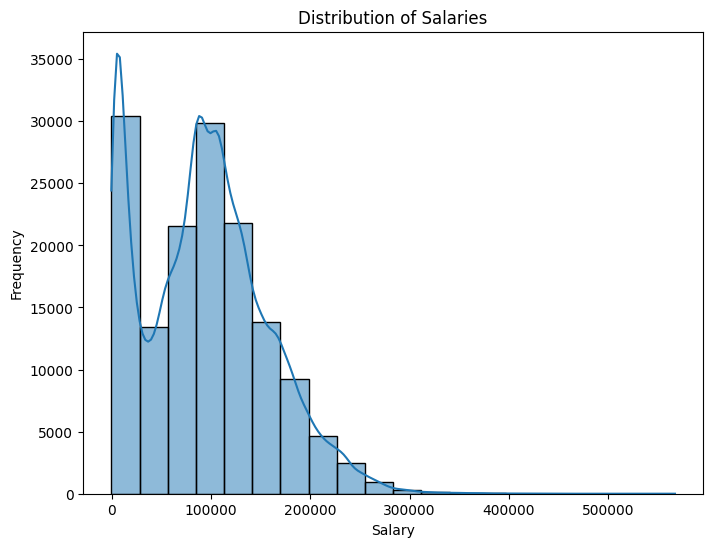

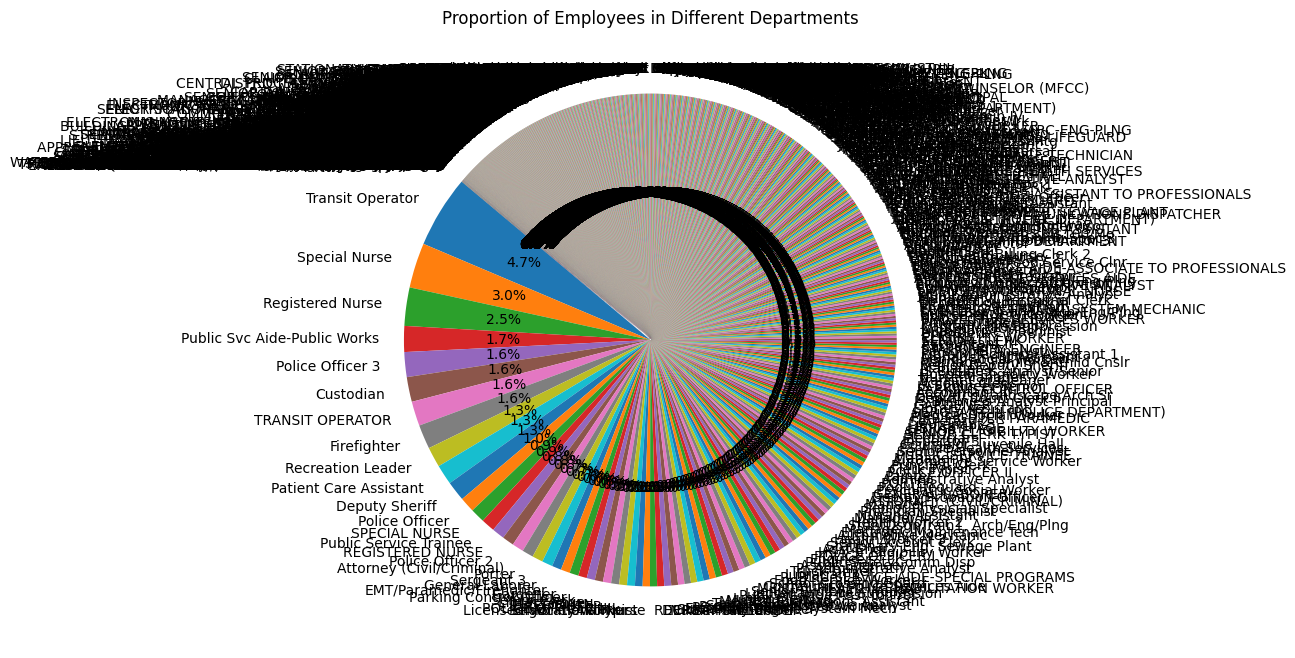

In [ ]:
# Histogram of salaries
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalPayBenefits'], bins=20, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Pie chart of departments
plt.figure(figsize=(8, 8))
department_counts = df['JobTitle'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.show()




# **5-Grouped Analysis**



In [ ]:
# Group the data by 'Year' and calculate summary statistics for each group
yearly_stats = df.groupby('Year').agg({'TotalPayBenefits': ['mean', 'median']})
print("\nSummary statistics by year:")
print(yearly_stats)

# Compare average salaries across different groups (here, we'll compare 'JobTitle' categories)
job_title_stats = df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False)
print("\nAverage salaries across different job titles:")
print(job_title_stats.head())



Summary statistics by year:
     TotalPayBenefits            
                 mean      median
Year                             
2011     71744.103871   68213.240
2012    100553.229232  101751.290
2013    101440.519714  101969.445
2014    100250.918884  101105.370

Average salaries across different job titles:
JobTitle
Chief Investment Officer                          436224.360000
Chief of Police                                   411732.266667
Chief, Fire Department                            408865.326667
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Gen Mgr, Public Trnsp Dept                        380696.440000
Name: TotalPayBenefits, dtype: float64


# **6-Simple Correlation Analysis**


Correlation between TotalPayBenefits and BasePay: 0.9465953315411133


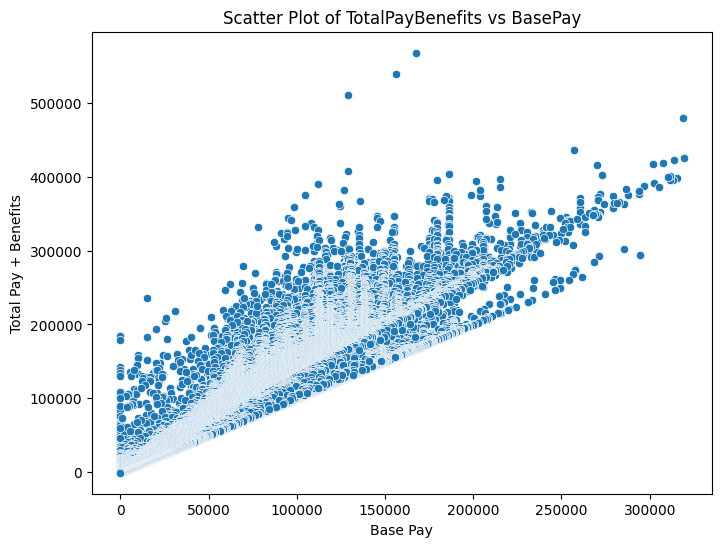

In [ ]:
# Identify correlation between 'TotalPayBenefits' and 'BasePay'
correlation = df['TotalPayBenefits'].corr(df['BasePay'])
print(f"\nCorrelation between TotalPayBenefits and BasePay: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BasePay', y='TotalPayBenefits', data=df)
plt.title('Scatter Plot of TotalPayBenefits vs BasePay')
plt.xlabel('Base Pay')
plt.ylabel('Total Pay + Benefits')
plt.show()



# **7-Summary of Insights**

The dataset contains information on employees, including their job titles, base pay, overtime pay, and other pay components.
The average salary across different job titles varies significantly.
Most employees fall within the lower to mid-range salary brackets, as shown by the salary distribution histogram.
The proportion of employees in different departments varies, with some departments having more representation than others.
There is a positive correlation between base pay and total pay plus benefits, indicating that employees with higher base pay tend to receive higher overall compensation.
These insights provide a basic understanding of the dataset and highlight areas for further analysis or investigation.




